# **The dataset blinkit_orders.csv contains information about 5,000 orders placed on Blinkit (a delivery platform). Here’s a breakdown of what each column represents:**

# **order_id –** A unique identifier for each order.

# **customer_id –** A unique identifier for the customer who placed the order.

# **order_date – **The timestamp when the order was placed.

# **promised_delivery_time –** The time by which delivery was promised to the customer.

# **actual_delivery_time –** The actual time the order was delivered.

# **delivery_status –** Indicates if the delivery was on time, late, etc. (in this sample, it's "On Time").

# **order_total –** Total value of the order in currency.

# **payment_method –** The method used to pay for the order (e.g., Cash, Card, UPI).

# **delivery_partner_id –** The ID of the delivery partner who delivered the order.

# **store_id –** The ID of the store from which the order was dispatched.

In [1]:
from google.colab import files
uploaded = files.upload()

Saving blinkit_orders.csv to blinkit_orders.csv


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# **Step 1: Load and Clean Data**

In [3]:
import pandas as pd

df = pd.read_csv('/content/blinkit_orders.csv')

df.head()

order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [4]:
df_products = pd.read_csv('blinkit_orders.csv')
df_products.head()


order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9886  
3                61497      7917  
4                84315      2741

In [5]:
print(df.head())
print(df.info())
print(df.describe())
print(df.isnull().sum())

     order_id  customer_id           order_date promised_delivery_time  \
0  1961864118     30065862  2024-07-17 08:34:01    2024-07-17 08:52:01   
1  1549769649      9573071  2024-05-28 13:14:29    2024-05-28 13:25:29   
2  9185164487     45477575  2024-09-23 13:07:12    2024-09-23 13:25:12   
3  9644738826     88067569  2023-11-24 16:16:56    2023-11-24 16:34:56   
4  5427684290     83298567  2023-11-20 05:00:39    2023-11-20 05:17:39   

  actual_delivery_time delivery_status  order_total payment_method  \
0  2024-07-17 08:47:01         On Time      3197.07           Cash   
1  2024-05-28 13:27:29         On Time       976.55           Cash   
2  2024-09-23 13:29:12         On Time       839.05            UPI   
3  2023-11-24 16:33:56         On Time       440.23           Card   
4  2023-11-20 05:18:39         On Time      2526.68           Cash   

   delivery_partner_id  store_id  
0                63230      4771  
1                14983      7534  
2                39859      9

In [6]:
# Convert 'order_date' column to datetime if it exists
if 'order_date' in df.columns:
    df['order_date'] = pd.to_datetime(df['order_date'], errors='coerce')


In [7]:
# Remove rows with missing values in essential columns
essential_cols = [col for col in ['order_id', 'product_name', 'order_date'] if col in df.columns]
df.dropna(subset=essential_cols, inplace=True)

In [8]:
# Remove duplicated rows if any
df.drop_duplicates(inplace=True)

# Show final shape of cleaned dataset
print(f"Final dataset shape: {df.shape}")

Final dataset shape: (5000, 10)


# **Top Ordered Products**

In [9]:
# Show top 10 most ordered products
if 'product_name' in df.columns:
    top_products = df['product_name'].value_counts().head(10)
    print(top_products)


# **Orders Over Time**

In [10]:
# Count number of orders per day
if 'order_date' in df.columns:
    orders_per_day = df.groupby(df['order_date'].dt.date).size()
    print(orders_per_day.tail())


order_date
2024-10-31     8
2024-11-01     9
2024-11-02     5
2024-11-03    12
2024-11-04     4
dtype: int64


# **Orders by Day of the Week**

In [11]:
# Number of orders by weekday
if 'order_date' in df.columns:
    df['weekday'] = df['order_date'].dt.day_name()
    orders_by_weekday = df['weekday'].value_counts().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])
    print(orders_by_weekday)


weekday
Monday       687
Tuesday      705
Wednesday    744
Thursday     720
Friday       715
Saturday     706
Sunday       723
Name: count, dtype: int64


# **Orders by Hour (if time info exists)**

In [12]:
# Extract hour if available
if 'order_date' in df.columns and df['order_date'].dt.hour.notnull().all():
    df['hour'] = df['order_date'].dt.hour
    orders_by_hour = df['hour'].value_counts().sort_index()
    print(orders_by_hour)


hour
0     221
1     209
2     200
3     189
4     215
5     216
6     204
7     217
8     240
9     181
10    203
11    184
12    193
13    239
14    197
15    204
16    197
17    204
18    226
19    228
20    227
21    195
22    198
23    213
Name: count, dtype: int64


# **1. Orders Over Time**

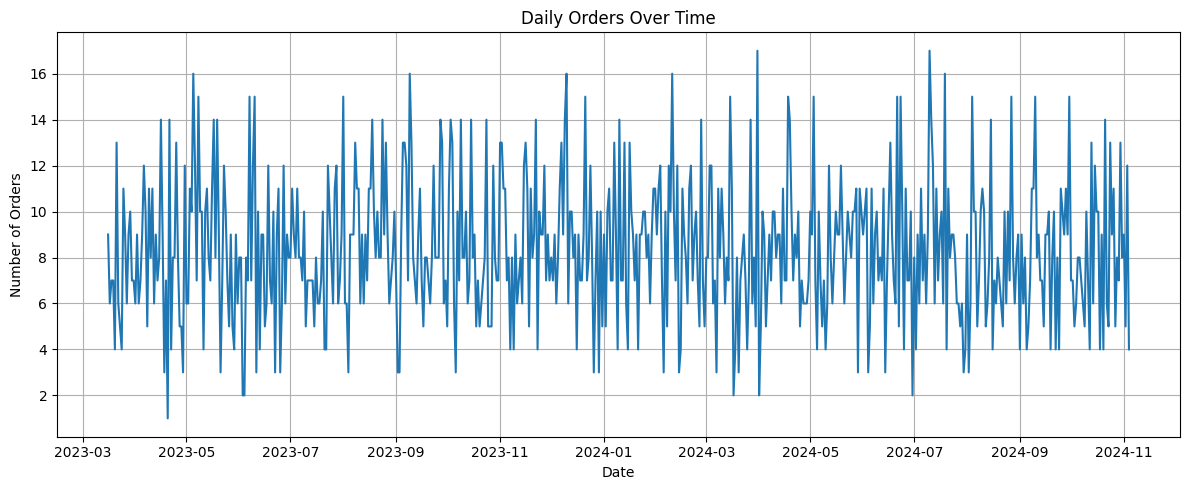

In [13]:
# Plot number of orders per day
plt.figure(figsize=(12, 5))
orders_per_day.plot()
plt.title("Daily Orders Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Orders")
plt.grid(True)
plt.tight_layout()
plt.show()


# **2. Orders by Day of Week**

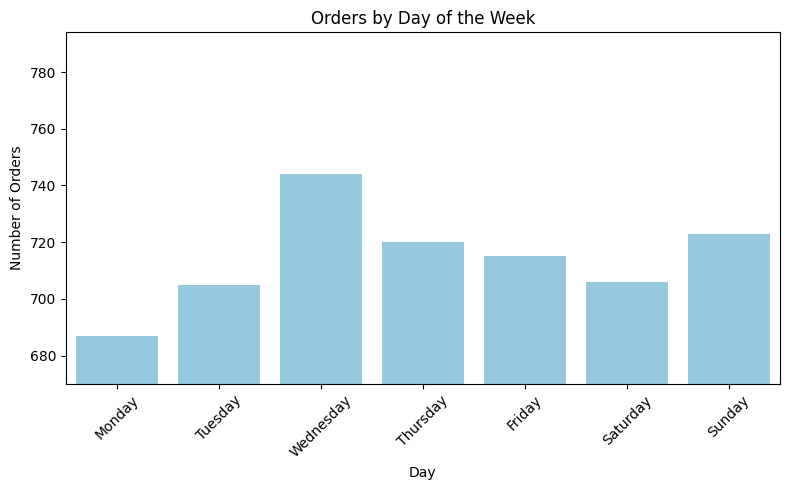

In [33]:
plt.figure(figsize=(8, 5))
sns.barplot(x=orders_by_weekday.index, y=orders_by_weekday.values, color="skyblue")  # استخدام اللون اللبني
plt.title("Orders by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Orders")
plt.ylim(670, max(orders_by_weekday.values) + 50)  # بداية من 650
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# ** 3. Orders by Hour**

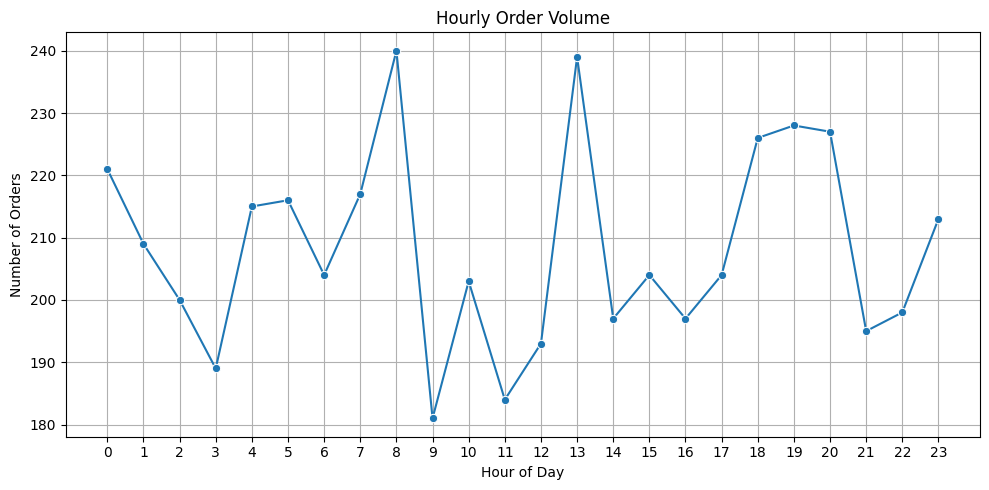

In [16]:
# Line plot of orders by hour
plt.figure(figsize=(10, 5))
sns.lineplot(x=orders_by_hour.index, y=orders_by_hour.values, marker='o')
plt.title("Hourly Order Volume")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Orders")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()


In [19]:
print(df.columns)


Index(['order_id', 'customer_id', 'order_date', 'promised_delivery_time',
       'actual_delivery_time', 'delivery_status', 'order_total',
       'payment_method', 'delivery_partner_id', 'store_id', 'weekday', 'hour'],
      dtype='object')


# **Most Used Payment Methods**

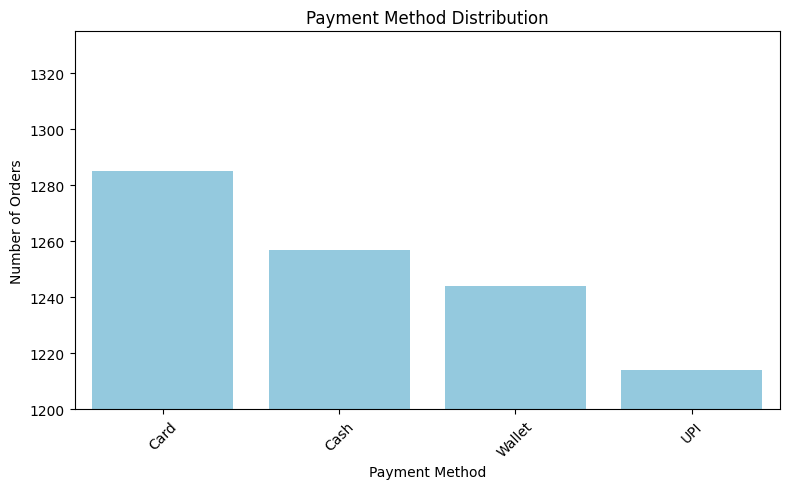

In [34]:
# Count usage of each payment method
if 'payment_method' in df.columns:
    payment_counts = df['payment_method'].value_counts()

    plt.figure(figsize=(8, 5))
    sns.barplot(x=payment_counts.index, y=payment_counts.values, color="skyblue")  # استخدام اللون الأزرق
    plt.title("Payment Method Distribution")
    plt.xlabel("Payment Method")
    plt.ylabel("Number of Orders")
    plt.ylim(1200, max(payment_counts.values) + 50)  # يبدأ من 1200
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


# **Delivery Status Distribution**

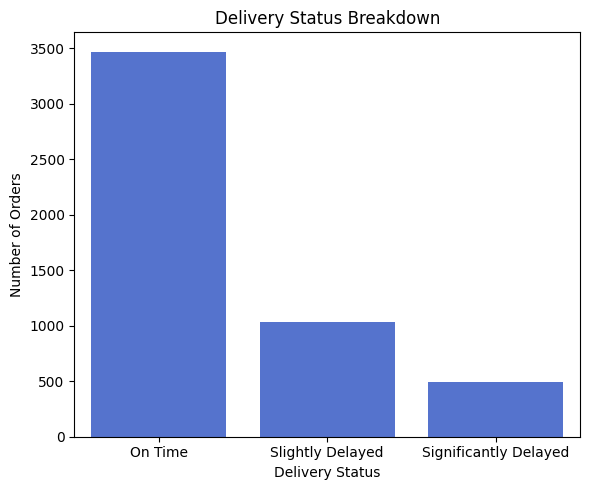

In [35]:
# Visualize delivery status breakdown
if 'delivery_status' in df.columns:
    status_counts = df['delivery_status'].value_counts()

    plt.figure(figsize=(6, 5))
    sns.barplot(x=status_counts.index, y=status_counts.values, color="royalblue")
    plt.title("Delivery Status Breakdown")
    plt.xlabel("Delivery Status")
    plt.ylabel("Number of Orders")
    plt.tight_layout()
    plt.show()


# **Average Order Total by Weekday**

<ipython-input-36-c55eb6433f9e>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=avg_total.index, y=avg_total.values, palette="Blues")  # استخدام تدرجات اللون الأزرق


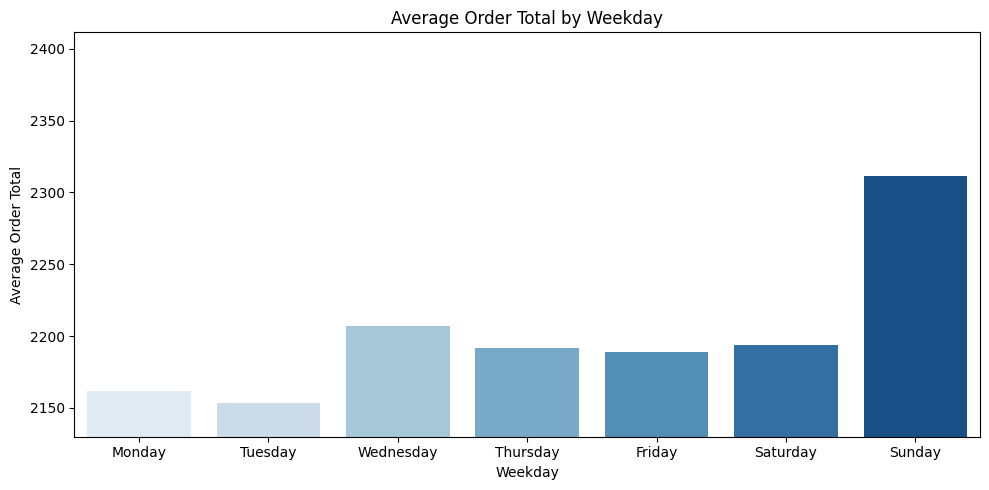

In [36]:
# Compare average order total across days
if 'order_total' in df.columns and 'weekday' in df.columns:
    avg_total = df.groupby('weekday')['order_total'].mean().reindex([
        'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
    ])

    plt.figure(figsize=(10, 5))
    sns.barplot(x=avg_total.index, y=avg_total.values, palette="Blues")
    plt.title("Average Order Total by Weekday")
    plt.xlabel("Weekday")
    plt.ylabel("Average Order Total")
    plt.ylim(2130, max(avg_total.values) + 100)
    plt.tight_layout()
    plt.show()


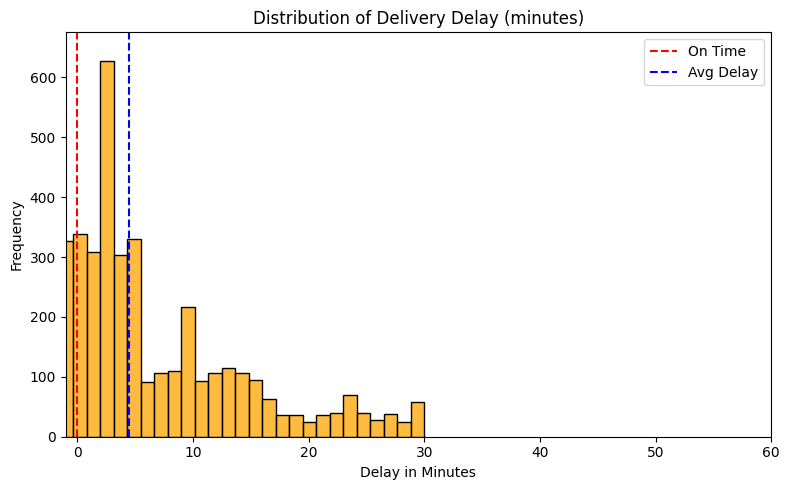

In [32]:
# Plotting the distribution of delivery delays in minutes to assess how often delays happen and their duration
df['promised_delivery_time'] = pd.to_datetime(df['promised_delivery_time'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delay_minutes'] = (df['actual_delivery_time'] - df['promised_delivery_time']).dt.total_seconds() / 60

plt.figure(figsize=(8,5))
sns.histplot(df['delay_minutes'], bins=30, kde=False, color='orange')  # إيقاف رسم KDE
plt.title('Distribution of Delivery Delay (minutes)')
plt.xlabel('Delay in Minutes')
plt.ylabel('Frequency')
plt.xlim(-1, 60)  # يبدأ من 0
plt.axvline(0, color='red', linestyle='--', label='On Time')
plt.axvline(df['delay_minutes'].mean(), color='blue', linestyle='--', label='Avg Delay')
plt.legend()
plt.tight_layout()
plt.show()



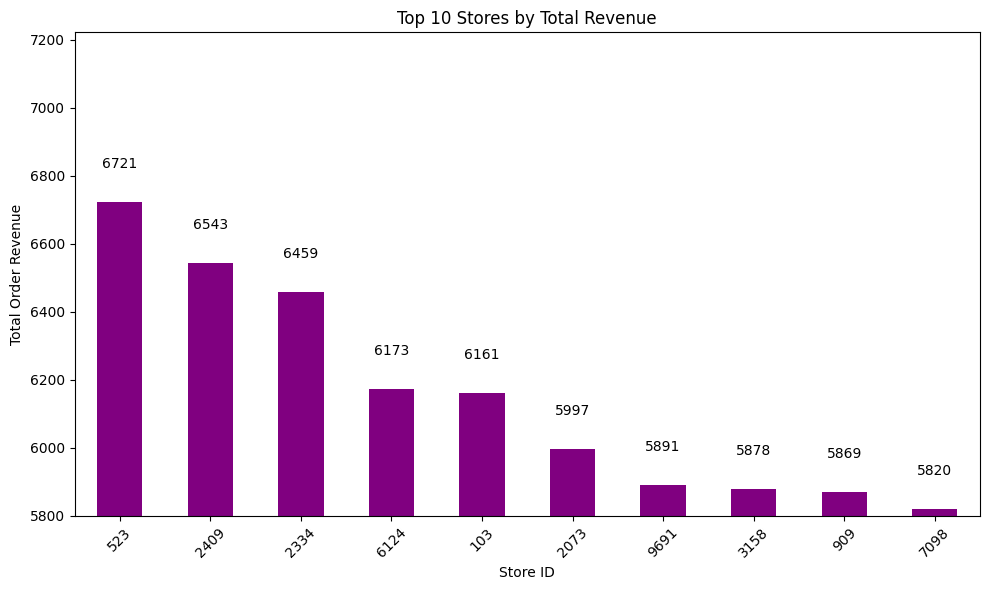

In [25]:
# Identifying the top 10 stores with the highest total revenue from orders
top_stores = df.groupby('store_id')['order_total'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_stores.plot(kind='bar', color='purple')

for i, val in enumerate(top_stores.values):
    plt.text(i, val + 100, f'{val:.0f}', ha='center')

plt.title('Top 10 Stores by Total Revenue')
plt.ylabel('Total Order Revenue')
plt.xlabel('Store ID')
plt.ylim(5800, max(top_stores.values) + 500)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [37]:
# Save cleaned data to a new CSV file
df.to_csv('cleaned_blinkit_orders.csv', index=False)


In [39]:
from google.colab import files
files.download('cleaned_blinkit_orders.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>